In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TQQQ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()


Date
2021-02-10    53.275002
2021-02-11    54.134998
2021-02-12    55.055000
2021-02-16    54.595001
2021-02-17    53.834999
Name: Close, dtype: float64

In [22]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [38]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


In [39]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# [[YOUR CODE]]
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)



### ADF 검정의 귀무가설은 DF 검정과 귀무가설이 같으므로 검정통계량이 Critical Value보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열 데이터라고 볼 수 있어요.

 

In [40]:
# 가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다. 
# 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.
# 로그 변환 시도 

ts_log = np.log(ts)


In [41]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.524069
p-value                          0.521573
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


### p-value가 0.36으로 무려 절반 이상 줄어들었습니다. 
### 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다. 
### 아주 효과적인 변환이었던 것 같습니다. 
### 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.

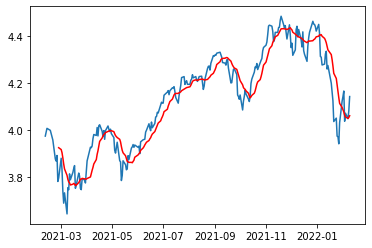

In [42]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### 시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다

In [43]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2021-02-10         NaN
2021-02-11         NaN
2021-02-12         NaN
2021-02-16         NaN
2021-02-17         NaN
2021-02-18         NaN
2021-02-19         NaN
2021-02-22         NaN
2021-02-23         NaN
2021-02-24         NaN
2021-02-25         NaN
2021-02-26   -0.128289
2021-03-01   -0.036858
2021-03-02   -0.072730
2021-03-03   -0.141241
Name: Close, dtype: float64

In [44]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2021-02-26   -0.128289
2021-03-01   -0.036858
2021-03-02   -0.072730
2021-03-03   -0.141241
2021-03-04   -0.166203
2021-03-05   -0.101470
2021-03-08   -0.163586
2021-03-09   -0.035404
2021-03-10   -0.033111
2021-03-11    0.038491
2021-03-12    0.021887
2021-03-15    0.050148
2021-03-16    0.063112
2021-03-17    0.078234
2021-03-18   -0.011514
Name: Close, dtype: float64

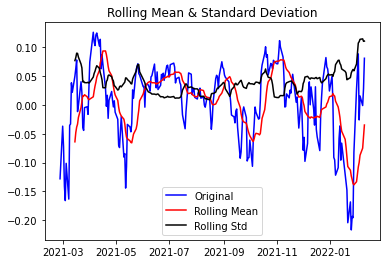

In [45]:
plot_rolling_statistics(ts_log_moving_avg)

In [46]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.385449
p-value                          0.000315
#Lags Used                       0.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


### p value 로 9로 오히려 증가함을 확인하였다  



In [47]:
moving_avg_7 = ts_log.rolling(window=7).mean()
ts_log_moving_avg_7 = ts_log - moving_avg_7
ts_log_moving_avg_7.dropna(inplace=True)
print('슝=3')

슝=3


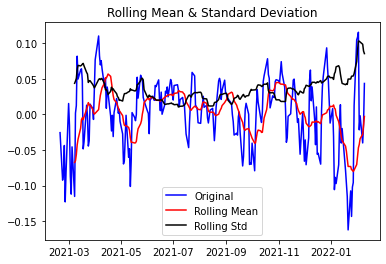

In [48]:
plot_rolling_statistics(ts_log_moving_avg_7)

In [49]:
augmented_dickey_fuller_test(ts_log_moving_avg_7)

Results of Dickey-Fuller Test:
Test Statistic                -6.258160e+00
p-value                        4.287974e-08
#Lags Used                     2.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


### Augmented Dickey-Fuller Test의 결과 p-value는 4.28 수준이어서 
###  아직도 안정적 시계열이라고 말할 수 없게 되었습니다.
### 이 데이터셋은 일별이기 때문에 7일= 일주일이라, windows = 7 으로 두었다. 

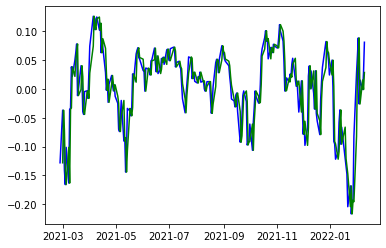

In [50]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

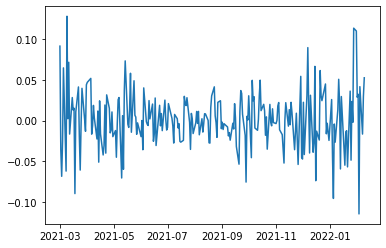

In [51]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

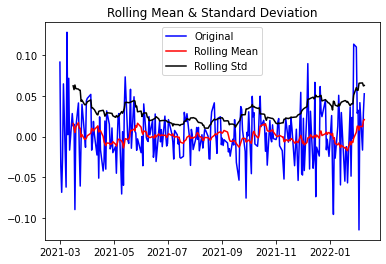

In [52]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [53]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.630799e+01
p-value                        3.217101e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


### 이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가
### 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, 
### p-value가 약 4 에서 3.21로 줄어들었습니다 



# 시계열 분해(Time Series Decomposition)


In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose


#ts_log.sort_index(inplace= True) #오류 때문에 추가한 코드 
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
### 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

In [56]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


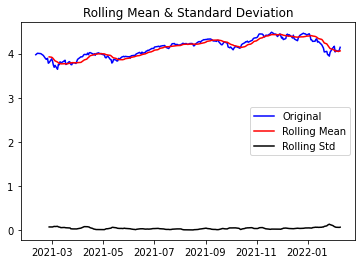

Results of Dickey-Fuller Test:
Test Statistic                  -1.524069
p-value                          0.521573
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


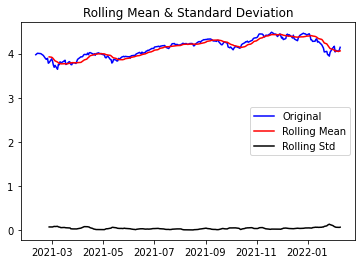

Results of Dickey-Fuller Test:
Test Statistic                  -1.524069
p-value                          0.521573
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


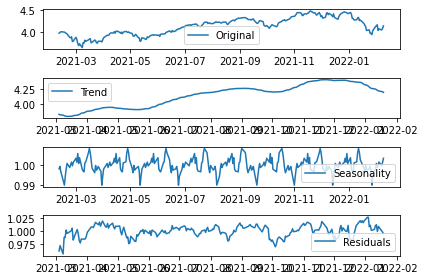

In [57]:
from statsmodels.tsa.stattools import adfuller

#검정을 통해 귀무가설을 기각하면 정상성을 띤다고 볼 수 있어요.
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


### decomposing 으로 얻어진 residual 은 압도적으로 낮은 p-value을 보여줍니다. (-->0.52)


In [58]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)
# [[YOUR CODE]]

Results of Dickey-Fuller Test:
Test Statistic                  -4.856232
p-value                          0.000042
#Lags Used                       6.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


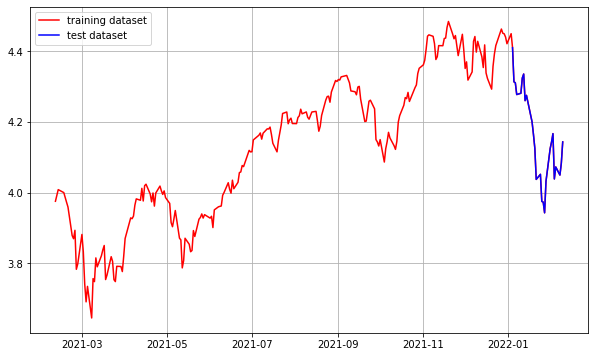

In [59]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [60]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2021-02-10    3.975467
2021-02-11    3.991481
Name: Close, dtype: float64
(227,)
(26,)


# ARIMA를 효과적으로 활용하기 위해서는 

# ARIMA의 모수(parameter)를 잘 설정해야 합니다


## ACF를 통해 이동평균 모형 MA 모델의 시차 'q'를 결정하고, 

## PACF를 통해 자기회귀 모형 AR 모델의 시차 'p'를 결정할 수 있음



/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


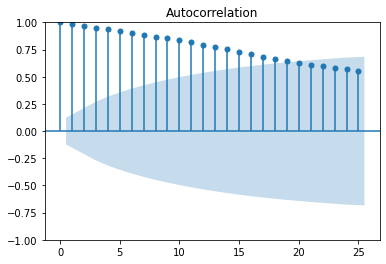

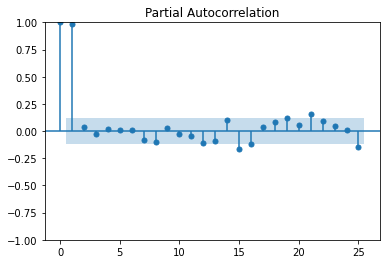

In [61]:
# ACF, PACF 그려보기 -> p,q 구하기 모수(p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# [[YOUR CODE]]

# pacf 그래프를 볼 때, p =1 이 적합합니다

## 왜냐하면, P=2 이상인 구간에서 PACF 는 거의 0 에 가까워지고 있기 때문입니다

### PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.

### 반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다. q에 대해서는 적합한 값이 없어 보입니다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠습니다.

### 아래 p 값 결과로 d = 1 , 1차 차분이 낫다는 판단을 내렸다


Results of Dickey-Fuller Test:
Test Statistic                -1.616018e+01
p-value                        4.474343e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


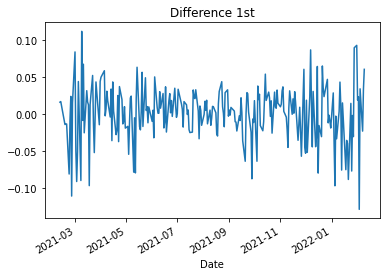

In [62]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.632975e+00
p-value                        1.986197e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
------------------------------------------------------------------------------------------


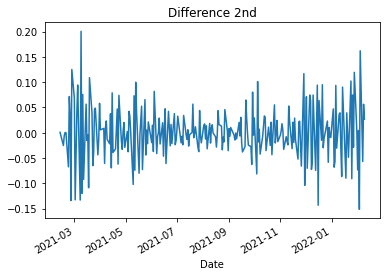

In [63]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
print('-'*90)

Results of Dickey-Fuller Test:
Test Statistic                -9.152490e+00
p-value                        2.663328e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
------------------------------------------------------------------------------------------


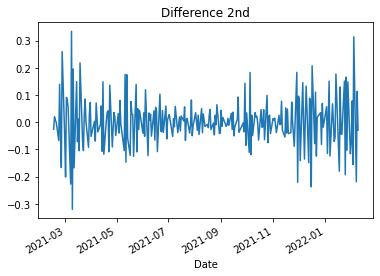

In [64]:
# 혹시 필요한 경우 2차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_3)
print('-'*90)

Results of Dickey-Fuller Test:
Test Statistic                -9.891808e+00
p-value                        3.541644e-17
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64
------------------------------------------------------------------------------------------


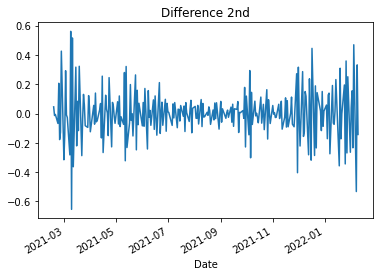

In [65]:
# 혹시 필요한 경우 2차 차분 구하기
diff_4 = diff_3.diff(periods=1).iloc[1:]
diff_4.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_4)
print('-'*90)

In [66]:
## ARIMA 모델 훈련하기


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 447.896
Date:                Thu, 10 Feb 2022   AIC                           -887.792
Time:                        04:51:53   BIC                           -874.110
Sample:                             0   HQIC                          -882.271
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0643      1.014      0.063      0.949      -1.923       2.052
ar.L2         -0.0411      0.083     -0.497      0.619      -0.203       0.121
ma.L1         -0.1317      1.017     -0.130      0.8

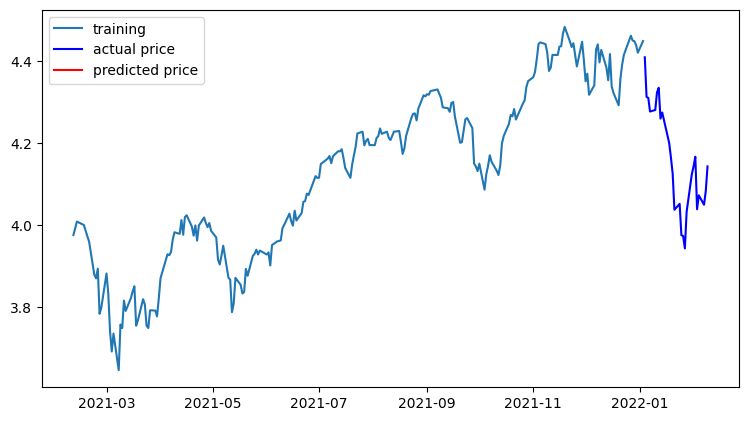

In [67]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model

model = ARIMA(train_data, order=(2, 1, 1))  

# order=(p,d,q) 
#p : 자기회귀 모형(AR)의 시차
# d : 차분 누적(I) 횟수
#q : 이동평균 모형(MA)의 시차
    
fitted_m = model.fit() 

print(fitted_m.summary())

fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given

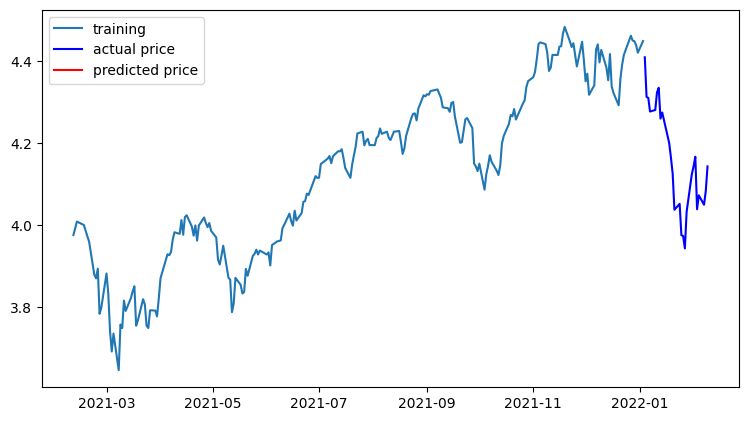

In [72]:
model = ARIMA(train_data, order=(20, 1, 0))  # p값을 18으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


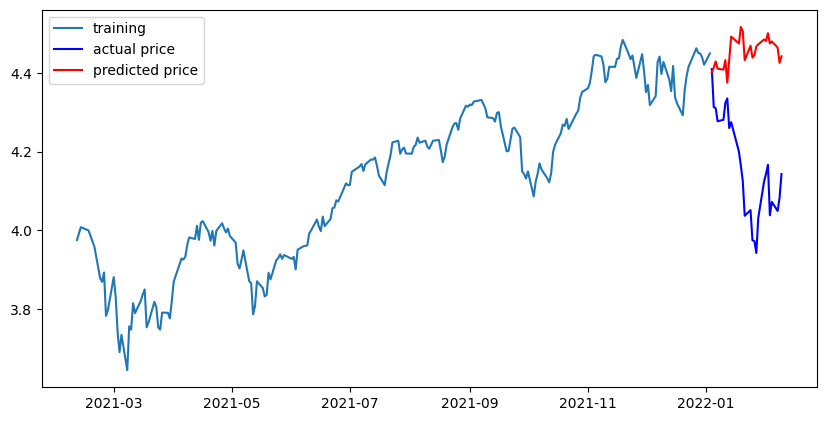

In [69]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

# Make as pandas series
# [[YOUR CODE]]

# Plot
# [[YOUR CODE]]

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  561.5580595014162
MAE:  21.49539122360481
RMSE:  23.697216281694697
MAPE: 35.76%


# 회고

## MAPE 의 특징 

- MAE를 퍼센트로 변환

- MAE와 같은 단점

- 모델에 대한 편향이 존재